# TF - IDF 만들기

In [211]:
txt = [
	['먹고 싶은 사과'], # doc1
	['먹고 싶은 바나나'], # doc2
	['길고 노란 바나나 바나나'], # doc3
	['저는 과일이 좋아요'] # doc4
]

In [212]:
# DTM 만들기
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

vec = CountVectorizer()
li = sum(txt, []) # 2차원 array 1차원으로 변형
val = vec.fit_transform(li).toarray()
key = vec.get_feature_names_out()
dtm = pd.DataFrame(val, columns=key)
dtm

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [218]:
N = len(dtm) # 전체 문서의 갯수 
txt = li # 원본 문서 
vocab = key # 전체 문서에서 사용된 단어집

# tf 만들기 : 문서(d) 내에 특정단어(t)의 개수
def tf(d, t):
    return d.count(t)

# df 만들기 : 특정단어(t)의 전체 문서(doc)에서 몇번 출현했는가?
def df(t, doc):
    cnt = 0
    for d in doc:
        if t in d:
            cnt += 1
    return cnt

# idf 만들기 : log(N/df(t, doc))
def idf(N, t, doc):
    from math import log
    return log(N/df(t, doc))

In [219]:
tf(txt[2], '바나나')

2

In [220]:
df('바나나', txt)

2

In [221]:
idf(N, '바나나', txt)

0.6931471805599453

In [222]:
# tf-idf : 해당 문서에서 특정 단어의 중요도를 나타내는 값
def tf_idf(N, t, d, doc):
    return tf(d, t) * idf(N, t, doc)

In [223]:
tf_idf(N, vocab[0], txt[0], txt)

0.0

In [224]:
# 각 문서별 단어들의 tf-idf 데이터 프레인 만들기
result = []
for d in txt: # 각 문서(d), 전체 문서(txt)
    result.append([]) # 데이터프레임으로 만들기 위해 2차원 리스트 만들기
    for t in vocab: # 각 단어(t), 전체 단어(vocab)
        result[-1].append(tf_idf(N, t, d, txt))

tf_idf = pd.DataFrame(result, columns=vocab)

In [225]:
tf_idf

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.693147,0.000000,1.386294,0.693147,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.000000
2,0.000000,1.386294,1.386294,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000
3,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,1.386294


In [226]:
dtm

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [227]:
# 1. 형태소 단위로 토큰화
# 2. pos tagging
# 3. 품사 단위에 따라 분리 또는 불용어 처리
# 4. 각 형태소를 이용해서 문장 또는 문서에서 출현빈도를 수치화 (BOW)
# 5. 각 형태소와 문서를 행렬로 만들기 (DTM)
# 6. tf-idf를 만들기

In [231]:
result ={}
for v in vocab:
    result[v] = idf(N, v, txt)
result
idf_sr = pd.Series(result)
idf_sr.sort_values(ascending=False)

과일이    1.386294
길고     1.386294
노란     1.386294
사과     1.386294
저는     1.386294
좋아요    1.386294
먹고     0.693147
바나나    0.693147
싶은     0.693147
dtype: float64

In [233]:
dtm.corr()

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
과일이,1.000000,-0.333333,-0.333333,-0.577350,-0.522233,-0.333333,-0.577350,1.000000,1.000000
길고,-0.333333,1.000000,1.000000,-0.577350,0.870388,-0.333333,-0.577350,-0.333333,-0.333333
노란,-0.333333,1.000000,1.000000,-0.577350,0.870388,-0.333333,-0.577350,-0.333333,-0.333333
먹고,-0.577350,-0.577350,-0.577350,1.000000,-0.301511,0.577350,1.000000,-0.577350,-0.577350
바나나,-0.522233,0.870388,0.870388,-0.301511,1.000000,-0.522233,-0.301511,-0.522233,-0.522233
사과,-0.333333,-0.333333,-0.333333,0.577350,-0.522233,1.000000,0.577350,-0.333333,-0.333333
싶은,-0.577350,-0.577350,-0.577350,1.000000,-0.301511,0.577350,1.000000,-0.577350,-0.577350
저는,1.000000,-0.333333,-0.333333,-0.577350,-0.522233,-0.333333,-0.577350,1.000000,1.000000
좋아요,1.000000,-0.333333,-0.333333,-0.577350,-0.522233,-0.333333,-0.577350,1.000000,1.000000


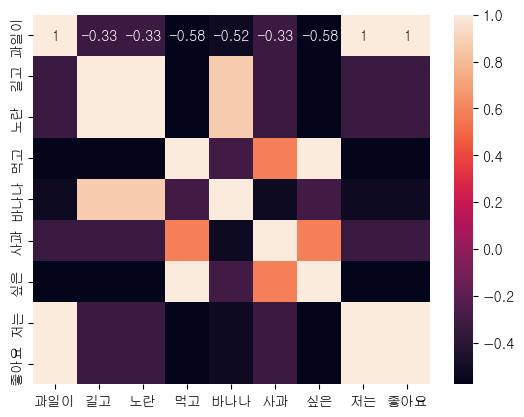

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Gulim')
sns.heatmap(dtm.corr(), annot=True)
plt.show()

In [236]:
txt = [
	['저는 사과 좋아요'], # doc1
	['저는 바나나 좋아요'], # doc2
	['저는 바나나 좋아요 저는 바나나 좋아요'] # doc3
]

In [246]:
# DTM 만들기
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

vec = CountVectorizer()
li = sum(txt, []) # 2차원 array 1차원으로 변형

val = vec.fit_transform(li).toarray()
key = vec.get_feature_names_out()

dtm = pd.DataFrame(val, columns=key)
dtm

,바나나,사과,저는,좋아요
0,0,1,1,1
1,1,0,1,1
2,2,0,2,2


In [247]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return round(dot(A, B) / (norm(A) * norm(B)), 2)

In [248]:
print('문서0, 문서1 :', cos_sim(val[0], val[1]))
print('문서0, 문서2 :', cos_sim(val[0], val[2]))
print('문서1, 문서2 :', cos_sim(val[1], val[2]))

문서0, 문서1 : 0.67
문서0, 문서2 : 0.67
문서1, 문서2 : 1.0


In [287]:
## 2021년 신년사로 워드 클라우드 만들기
from konlpy.tag import Okt
# 형태소 분석기 선택
okt = Okt()

# 신년사 파일 열기
f = open('2021_newyear.txt', 'r', encoding='utf-8')
text = f.read()
f.close()

In [288]:
review1 = '소, 돼지 무한리필로 픽 소고기 돼지고기 외 오리고기 새우 등 여러가지를 맘껏 즐길수 있어서 좋아요. 고기도 셀프로 가져올수 있어서 더욱 더 편하게 즐길 수 있는 외 곁들임 반찬들도 너무 다양하고 맛있어서 파김치 꼭 드세요 맛있게 오래 즐길 수 있어요 부천역에서 무한리필 고깃집 찾으신다면 꼭 방문하세요'
review2 = '저녁약속이 불가피하게 깨져서 그냥 집들어가긴 마니 서운해서 삼겹살매니아라 급검색하고 들어간 무한리필 우리동네집 오다가다 한번 가봐야지했는데 혼자먹으러들어갔네요 저녁피크타임이라 전화로 1인식사되는지 물어봤는데 바로 됩니다 하셔서 바로 콜 빠질수 없는 이슬친구와 삼겹살 야채 등 좋아하는 거 우선 셋팅 고기질도 좋고 야채도 신선해서 오길 잘했다 아주 맛나게 혼자 배부르게 먹었네요 거기에 친절은 덤 다음엔 가족 친구들과 와야겠어요 재방의사 있습니다'
review3 = '매번 주기적으로 오는 우리동네 고깃집 셀프바에서 가져다 먹는 방식이라 너무편하고 내가 먹고싶은것만 먹고싶은 양으로 먹을수있어서 넘 좋아요 불판에 이집 콩나물이랑 김치 굽굽하고 삼겹살이랑 같이 먹으면 넘 맛도리 새로 생긴 얇게썰린 이 꽃삽겹이 진짜 너무 맛잇어요 구워서 계속 통으로 먹고 왔네요 그리고 직원분들 너무 친절하세요 항상 갈때마다 감덩받고옴여 가격도 착하고 맛도 착하고 서비스도 체고입니다'

In [289]:
reviews = [review1, review2, review3]
reviews

['소, 돼지 무한리필로 픽 소고기 돼지고기 외 오리고기 새우 등 여러가지를 맘껏 즐길수 있어서 좋아요. 고기도 셀프로 가져올수 있어서 더욱 더 편하게 즐길 수 있는 외 곁들임 반찬들도 너무 다양하고 맛있어서 파김치 꼭 드세요 맛있게 오래 즐길 수 있어요 부천역에서 무한리필 고깃집 찾으신다면 꼭 방문하세요',
 '저녁약속이 불가피하게 깨져서 그냥 집들어가긴 마니 서운해서 삼겹살매니아라 급검색하고 들어간 무한리필 우리동네집 오다가다 한번 가봐야지했는데 혼자먹으러들어갔네요 저녁피크타임이라 전화로 1인식사되는지 물어봤는데 바로 됩니다 하셔서 바로 콜 빠질수 없는 이슬친구와 삼겹살 야채 등 좋아하는 거 우선 셋팅 고기질도 좋고 야채도 신선해서 오길 잘했다 아주 맛나게 혼자 배부르게 먹었네요 거기에 친절은 덤 다음엔 가족 친구들과 와야겠어요 재방의사 있습니다',
 '매번 주기적으로 오는 우리동네 고깃집 셀프바에서 가져다 먹는 방식이라 너무편하고 내가 먹고싶은것만 먹고싶은 양으로 먹을수있어서 넘 좋아요 불판에 이집 콩나물이랑 김치 굽굽하고 삼겹살이랑 같이 먹으면 넘 맛도리 새로 생긴 얇게썰린 이 꽃삽겹이 진짜 너무 맛잇어요 구워서 계속 통으로 먹고 왔네요 그리고 직원분들 너무 친절하세요 항상 갈때마다 감덩받고옴여 가격도 착하고 맛도 착하고 서비스도 체고입니다']

In [290]:
# DTM 만들기
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

vec = CountVectorizer()
val = vec.fit_transform(reviews).toarray()
key = vec.get_feature_names_out()

dtm = pd.DataFrame(val, columns=key)
dtm

,1인식사되는지,가격도,가봐야지했는데,가져다,가져올수,가족,갈때마다,감덩받고옴여,같이,거기에,...,친절하세요,콩나물이랑,통으로,파김치,편하게,하셔서,한번,항상,혼자,혼자먹으러들어갔네요
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,1,1
2,0,1,0,1,0,0,1,1,1,0,...,1,1,1,0,0,0,0,1,0,0


In [291]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return round(dot(A, B) / (norm(A) * norm(B)), 2)

In [292]:
print('리뷰 0, 리뷰 1 :', cos_sim(val[0], val[1]))
print('리뷰 0, 리뷰 2 :', cos_sim(val[0], val[2]))
print('리뷰 1, 리뷰 2 :', cos_sim(val[1], val[2]))

리뷰 0, 리뷰 1 : 0.02
리뷰 0, 리뷰 2 : 0.09
리뷰 1, 리뷰 2 : 0.0


In [293]:
## 형태소 분석기 import
from konlpy.tag import Okt
okt = Okt()
txt = ''.join(reviews)
okt.nouns(txt)
col_name = np.unique(okt.nouns(txt))
col_name

tf(review1, col_name[0])

result = []
for r in reviews:
    result.append([])
    for c in col_name:
        result[-1].append(tf(r, c))
df = pd.DataFrame(result, columns=col_name)
df

,가격,가족,감덩,거,거기,검색,겹,계속,고기,고깃집,...,친절,콜,콩나물,통,파김치,피크타임,픽,한번,항상,혼자
0,0,0,0,0,0,0,0,0,4,1,...,0,0,0,0,1,0,1,0,0,0
1,0,1,0,2,1,1,2,0,1,0,...,1,1,0,0,0,1,0,1,0,2
2,1,0,1,0,0,0,2,1,0,1,...,1,0,1,1,0,0,0,0,1,0


In [294]:
print('리뷰 0, 리뷰 1 :', cos_sim(df.iloc[0,:], df.iloc[1,:]))
print('리뷰 0, 리뷰 2 :', cos_sim(df.iloc[0,:], df.iloc[2,:]))
print('리뷰 1, 리뷰 2 :', cos_sim(df.iloc[1,:], df.iloc[2,:]))

리뷰 0, 리뷰 1 : 0.19
리뷰 0, 리뷰 2 : 0.17
리뷰 1, 리뷰 2 : 0.45


In [28]:
## Word2Vec
import pandas as pd
import numpy as np

df_txt = pd.read_csv('ratings_test.txt', sep='\t', encoding='utf-8')
df_txt.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [29]:
df_txt['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [30]:
df_txt

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [4]:
df_txt = df_txt.dropna(subset=['document'])

In [5]:
## 사용할 형태소의 품사 (noun, adjective, adverb)
from konlpy.tag import Okt
okt = Okt()

mor_lst=[]

for col in df_txt['document']:
    text = okt.pos(col)
    for txt in text:
        if txt[1]=='Adjective' or txt[1] =='Noun' or txt[1] == 'Adverb':
            mor_lst.append(txt[0])

mor_lst

['더빙',
 '진짜',
 '짜증나네요',
 '목소리',
 '흠',
 '포스터',
 '보고',
 '초딩',
 '영화',
 '줄',
 '오버',
 '연기',
 '가볍지',
 '무재',
 '밓었',
 '다그',
 '래서',
 '추천',
 '다',
 '교도소',
 '이야기',
 '구먼',
 '솔직히',
 '재미',
 '없다',
 '평점',
 '조정',
 '몬페',
 '의',
 '익살스런',
 '연기',
 '영화',
 '스파이더맨',
 '커스틴',
 '던스트',
 '너무나도',
 '이뻐',
 '막',
 '걸음',
 '마',
 '세',
 '초등학교',
 '학년',
 '생인',
 '영화',
 '반개',
 '아까',
 '움',
 '원작',
 '긴장감',
 '제대로',
 '별',
 '반개',
 '아깝다',
 '욕',
 '이응경',
 '길용우',
 '생활',
 '년',
 '정말',
 '발',
 '해도',
 '그것',
 '납치',
 '감금',
 '반복',
 '반복',
 '드라마',
 '가족',
 '없다',
 '연기',
 '사람',
 '네',
 '액션',
 '없는데도',
 '재미',
 '있는',
 '몇',
 '안되는',
 '영화',
 '왜케',
 '평점',
 '낮은건데',
 '꽤',
 '볼',
 '데',
 '헐리우드',
 '화려함에만',
 '너무',
 '있나',
 '걍',
 '인피니트',
 '짱',
 '진짜',
 '볼때',
 '향수',
 '자극',
 '허진호',
 '감성',
 '절제',
 '멜로',
 '달인',
 '울면',
 '손',
 '횡단보도',
 '때',
 '뻔',
 '이범수',
 '연기',
 '드럽게',
 '담백하고',
 '깔끔해서',
 '좋다',
 '로만',
 '자꾸',
 '그',
 '사람',
 '것',
 '취향',
 '존중',
 '다지',
 '진짜',
 '내생',
 '극장',
 '영화',
 '가장',
 '노잼',
 '노',
 '감동',
 '임',
 '스토리',
 '어거지',
 '감동',
 '어거지',
 '냥',
 '매번',
 '긴장',
 '재밋음',
 '사람',
 '바

In [6]:
len(mor_lst)

1130792

In [15]:
def tokenizer(txt):
    tokens_ko = okt.nouns(txt)
    return tokens_ko

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer # TfidfVectorizer는 텍스트 데이터를 입력으로 받아 TF-IDF 행렬을 생성
df_txt = df_txt.iloc[:30000, :]

tfidf_vec = TfidfVectorizer(tokenizer = tokenizer, min_df=10) # min_df는 단어의 최소 등장 횟수 설정
tfidf_matrix = tfidf_vec.fit_transform(df_txt['document'])
tfidf_matrix # 너무 컬럼 수가 많아서 

<30000x2205 sparse matrix of type '<class 'numpy.float64'>'
	with 137659 stored elements in Compressed Sparse Row format>

In [19]:
df = pd.DataFrame(tfidf_matrix.toarray())

In [21]:
df.iloc[0,:].max()

0.6712274609721991

In [23]:
df.iloc[0,:].sort_values(ascending=False)

695     0.671227
449     0.636976
1801    0.379097
1480    0.000000
1481    0.000000
          ...   
730     0.000000
729     0.000000
728     0.000000
727     0.000000
2204    0.000000
Name: 0, Length: 2205, dtype: float64

In [24]:
col_name = tfidf_vec.get_feature_names_out()

In [27]:
col_name[[695,449,1801]]

array(['목소리', '더빙', '진짜'], dtype=object)

In [43]:
# 10개의 데이터에서 최대 tf-idf의 단어 찾기
df_10 = df.iloc[0:len(df), :]
for i in range(len(df_10)):
    top = df_10.iloc[i, :].sort_values(ascending=False)
    top3 = top[top > 0].index
    if len(top3) > 3:
        top3 = top3[:3]
    print(df_txt.iloc[1000 + i, 1])  ## 실제 코멘트
    print(col_name[top3]) ## 해당 코멘트의 핵심 단어

정말 최고의 명작 성인이 되고 본 이집트의 왕자는 또 다른 감동 그자체네요
['목소리' '더빙' '진짜']
이영화만 성공 했어도 스퀘어가 에닉스랑 합병 할일은 없었을텐데..
['오버' '흠' '초딩']
울컥하는 사회현실 ㅠㅠ
['무재' '추천']
기대를하나도안하면 할일없을때보기좋은영화
['이야기' '재미' '평점']
소림사 관문 통과하기 진짜 어렵다는거 보여준 영화..극장에서 개봉하는거 반갑다..
['스파이더맨' '의' '연기']
시리즈안나오나 ㅠㅠㅠㅠㅠㅠㅠㅠ
['학년' '초등학교' '마']
끝난다는 사실이 너무 슬퍼요. 가슴이 뻥 뚫려버린것같아..
['제대로' '긴장감' '원작']
펑점조절
['반복' '생활' '네']
와..이건진짜 으리으리한데..?
['몇' '액션' '재미']
손발이 오그라드네요..................
['왜케' '헐리우드' '꽤']
더빙이 문제가 아냐;;;; 내용이랑 그래픽이 전체적으로 글러먹었어
['짱' '진짜']
죠스,딥블루씨를 못따라감..
['절제' '향수' '자극']
아 진짜 너무 어이없다ㅋㅋㅋ
['울면' '손' '뻔']
제목이 잘못됬다. 모텔스캔들이 딱인데.. 곽지민 본다고 끝까지 봤지만 정말 끔찍하다. 모텔아줌마 억지스럽고 뜬금없고 .. 곽지민 봐서 +1 점 준다ㅋㅋ
['자꾸' '로만' '그']
1점 주기도 아까운 쓰레기
['어거지' '감동' '내생']
최근 '사랑과 전쟁' 식의 영화가 자주 등장한다. 만약 그런 부류의 영화들이 질이 좋고 평이 높다면 사람들은 욕을 하면서도 찾아 볼것이다. 그러나 영화의 질적인 면이 지금처럼 드라마의 수준을 넘지 못한다면 앞으로도 계속 외면받을 것이다.
['매번' '재밋음' '긴장']
코믹하지도 슬프지도 않고 이런 뭐니 내용은 또 뭐야 가면갈수록 지겨웠다
['이기' '아이돌' '코']
류덕환의 신의퀴즈는 신의 한수였다!
['표절' '뒤' '갈수록']
오랜만에 봤는데...편집, 대사, 연기...오글거리고...좀 안맞음;;;
['깨알' '일드' '캐스팅']
귀여워요 에헤헹 패턴,자기만의 패

In [70]:
df_txt.dropna(inplace=True)
df_txt[df_txt['document'].str.contains('아까운')][:20]

,id,document,label
353,9831680,돈과 시간이 아까운 영화,0
471,9990660,시나리오 연출 연기 어느것 하나 갖추지 못한 시간이 넘 아까운 억지 싸구려 중국 신...,0
647,5812647,진짜 퀵이유로 이렇게 어이없고 재미없는영화는 처음입니다 진짜 돈아까운적은 두번째라,0
715,8098523,1점도 아까운 쓰레기영화 전작이 아까움,0
950,9444015,근 5년동안 본 모든영화 통틀어서 최악의영화..시간이 남아돌때 봐도 시간이 아까운 ...,0
1014,9884113,1점 주기도 아까운 쓰레기,0
1020,6571993,내 아까운 시간을 버리게한 쓰레기 재미없다..2점부터 점수준것들 M창,0
1033,9950660,내 생에 가장 아까운 2시간,0
1135,4424543,보는 시간조차 아까운 영화...,0
1374,4587561,봐주기 아까운 영화,0


In [76]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df.loc[[353],:], df.loc[[1135],:]))
print(df_txt.iloc[353, 1])
print(df_txt.iloc[1135, 1])

[[0.7116726]]
돈과 시간이 아까운 영화
보는 시간조차 아까운 영화...


In [79]:
# 10개의 데이터에서 최대 tf-idf의 단어 찾기
df_10 = df.iloc[[353,1135], :]
for i in range(len(df_10)):
    top = df_10.iloc[i, :].sort_values(ascending=False)
    top3 = top[top > 0].index
    # if len(top3) > 3:
    #     top3 = top3[:3]
    print(df_txt.iloc[df_10.index[i], 1])  ## 실제 코멘트
    print(col_name[top3]) ## 해당 코멘트의 핵심 단어

돈과 시간이 아까운 영화
['돈' '시간' '영화']
보는 시간조차 아까운 영화...
['시간' '영화']


In [80]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df.loc[[1628],:], df.loc[[1868],:]))
print(df_txt.iloc[1628, 1])
print(df_txt.iloc[1868, 1])

[[0.36141015]]
1점도 아까운영화단1도 안무서움
1점도 아까운... 영화라고 말하는게 부끄러운


In [81]:
# 10개의 데이터에서 최대 tf-idf의 단어 찾기
df_10 = df.iloc[[1628,1868], :]
for i in range(len(df_10)):
    top = df_10.iloc[i, :].sort_values(ascending=False)
    top3 = top[top > 0].index
    # if len(top3) > 3:
    #     top3 = top3[:3]
    print(df_txt.iloc[df_10.index[i], 1])  ## 실제 코멘트
    print(col_name[top3]) ## 해당 코멘트의 핵심 단어

1점도 아까운영화단1도 안무서움
['무서움' '점도' '도' '안']
1점도 아까운... 영화라고 말하는게 부끄러운
['점도' '말' '영화']


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(df, df_txt.iloc[:30000, -1], test_size=0.3, random_state=1)

In [84]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [85]:
from sklearn.metrics import accuracy_score
pred=lr.predict(X_test)
print(accuracy_score(y_test, pred)) # 73%정도 맞춘다.

0.7377777777777778


In [87]:
y_test

10747    1
12573    1
29677    0
8856     0
21098    0
        ..
3344     0
14405    1
11459    0
15814    0
23883    1
Name: label, Length: 9000, dtype: int64

In [103]:
# 활용 : 쇼핑몰에 달린 제품 리뷰로 제품을 평가할 수 있다.


n = 1000
idx = y_test.index[n]
print(df_txt.iloc[idx, 1])
print('해당 리뷰의 레이블 : ', df_txt.iloc[idx, -1], '예측된 Label : ', pred[n])

여러부류의사랑이야기 ... 풍경이너무예쁘다
해당 리뷰의 레이블 :  1 예측된 Label :  1
